Spotify 2024 Data Analysis

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Loading data
from google.colab import drive
# Authenticate and mount Google Drive
drive.mount('/content/drive')
CR_data=pd.read_csv('/content/drive/MyDrive/Most Streamed Spotify Songs 2024.csv',encoding='unicode_escape')

Mounted at /content/drive


In [ ]:
competition_name = "Most Streamed Spotify Songs 2023"

# Mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")

kaggle_creds_path = "/content/DataKaggle/kaggle (1).json"

! pip install kaggle --quiet


! cp /content/DataKaggle/kaggle (1).json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c {competition_name}

#! mkdir kaggle_data
! unzip {competition_name + ".zip"} -d kaggle_data

# Unmount your Google Drive
drive.flush_and_unmount()

In [4]:
print(CR_data.shape)
CR_data.isnull().sum()

(4600, 29)


,0
Track,0
Album Name,0
Artist,5
Release Date,0
ISRC,0
All Time Rank,0
Track Score,0
Spotify Streams,113
Spotify Playlist Count,70
Spotify Playlist Reach,72


Data has quite a null values across multiple columns hence need to clean it


In [4]:
#Cleaning data
#Dropping colunns which have null rows more than 4000
CR_drop=[i for i in CR_data.columns if CR_data[i].isnull().sum()>4000]
CR_data.drop(CR_drop,axis=1,inplace=True)
#Dropping irrelanvat columns
CR_data.drop('ISRC',axis=1,inplace=True)
CR_data['Release Date']= pd.to_datetime(CR_data['Release Date'])
CR_data['year'] = CR_data['Release Date'].dt.year
CR_data.drop('Release Date',axis=1,inplace=True)


In [5]:
#Dropping Duplicate values
CR_data.drop_duplicates(keep="first", inplace = True)
CR_data.duplicated().sum()

#Handling Missing values:
#Dropping rows with more than 50%null values
CR_data.dropna(thresh=CR_data.shape[1]*0.5,inplace=True)

In [6]:
#For numeric conversion we have to replace the commas present in the values (like views 234,748)
#and then convert

for col in CR_data.columns[5:]:
   if CR_data[col].dtype == 'object':
    CR_data[col] = pd.to_numeric(CR_data[col].str.replace(',','')) # remove commas from strings before conversion

CR_data.info()

## Removed irrelenavt columns as ISRC, ectracted year from release data and dropped that along with
# columns whose values are more than 4000 null dropped those


<class 'pandas.core.frame.DataFrame'>
Index: 4344 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4344 non-null   object 
 1   Album Name                  4344 non-null   object 
 2   Artist                      4344 non-null   object 
 3   All Time Rank               4344 non-null   object 
 4   Track Score                 4344 non-null   float64
 5   Spotify Streams             4319 non-null   float64
 6   Spotify Playlist Count      4343 non-null   float64
 7   Spotify Playlist Reach      4343 non-null   float64
 8   Spotify Popularity          3772 non-null   float64
 9   YouTube Views               4197 non-null   float64
 10  YouTube Likes               4191 non-null   float64
 11  TikTok Posts                3408 non-null   float64
 12  TikTok Likes                3599 non-null   float64
 13  TikTok Views                3598 non-n

Handling missing data.
Performating Imputation.
Checning skewness and replacing it with median for skewed data and for noramlly distributed by mean.


In [7]:
#Imputation
#Replacing with mean median
for i in CR_data.columns[5:]:
  if CR_data[i].any()!='object':
    #checking skeweness if skewes repalcing with median else mean
    if CR_data[i].skew()>1 or CR_data[i].skew() < -1:
      CR_data[i].fillna(CR_data[i].median(),inplace=True)
    else:
        CR_data[i].fillna(CR_data[i].mean(),inplace=True)
CR_data.isnull().sum()

,0
Track,0
Album Name,0
Artist,0
All Time Rank,0
Track Score,0
Spotify Streams,0
Spotify Playlist Count,0
Spotify Playlist Reach,0
Spotify Popularity,0
YouTube Views,0


In [8]:
#To check if any duplicate data present
CR_data.sort_values(by='Spotify Streams',ascending=False).head(15)

,Track,Album Name,Artist,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,year
55,Blinding Lights,Blinding Lights,The Weeknd,56,194.0,4.281469e+09,590392.0,165544011.0,83.0,8.338071e+08,...,1116.0,564.0,11701129.0,184.0,489299762.0,319634.0,28659471.0,28994660.0,0,2019
53,Shape of You,Shape of You,Ed Sheeran,54,195.1,3.909459e+09,316378.0,148037882.0,80.0,8.013997e+09,...,282.0,512.0,2710931.0,115.0,733565655.0,651557.0,78149375.0,1146246.0,0,2017
132,Someone You Loved,Breach,Lewis Capaldi,133,129.7,3.427499e+09,338763.0,160553919.0,82.0,2.153702e+09,...,381.0,502.0,4834088.0,110.0,427212257.0,357540.0,3201843.0,29266297.0,0,2018
114,Sunflower - Spider-Man: Into the Spider-Verse,Sunflower (Spider-Man: Into the Spider-Verse),Post Malone,116,143.9,3.358704e+09,392082.0,123917182.0,79.0,2.763189e+09,...,86.0,86.0,809352.0,99.0,546367356.0,906813.0,3201843.0,1569935.0,0,2018
19,As It Was,As It Was,Harry Styles,20,292.0,3.301815e+09,407119.0,169783402.0,87.0,8.008993e+08,...,4909.0,330.0,12907852.0,189.0,132624772.0,79909.0,3201843.0,14967379.0,0,2022
262,Starboy,Starboy,The Weeknd,265,95.7,3.291262e+09,366133.0,98022646.0,84.0,2.829991e+09,...,148.0,118.0,875683.0,67.0,331295154.0,418888.0,23612071.0,15648166.0,1,2016
519,One Dance,One Dance (feat. Wizkid & Kyla) - Single,Drake,518,67.9,3.192204e+09,379853.0,131832723.0,82.0,4.568069e+08,...,932.0,165.0,1383884.0,97.0,714508129.0,601041.0,3201843.0,21316589.0,0,2016
26,STAY (with Justin Bieber),STAY (with Justin Bieber),The Kid LAROI,27,266.3,3.107100e+09,451732.0,134793519.0,78.0,1.256974e+09,...,4096.0,166.0,5783693.0,128.0,196783487.0,124922.0,36341585.0,856278.0,1,2021
2397,STAY (with Justin Bieber),Stay,The Kid LAROI,"2,385",29.2,3.107100e+09,11726.0,2225897.0,53.0,1.449970e+08,...,86.0,1.0,8421.0,20.0,12574320.0,7638.0,3201843.0,15411173.0,0,2021
39,Dance Monkey,Dance Monkey,Tones And I,40,214.5,3.071214e+09,375201.0,64901153.0,71.0,3.366447e+09,...,169.0,584.0,5749770.0,121.0,373294159.0,844198.0,37430204.0,44842636.0,0,2019


EDA

3788


<Axes: xlabel='Artist'>

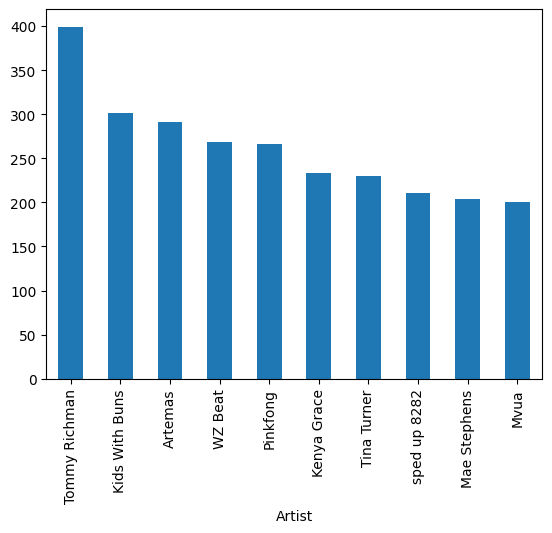

In [9]:
#Top 10 artist by track score
print(len(CR_data['Album Name'].unique()))
CR_data.groupby('Artist')['Track Score'].mean().sort_values(ascending=False).head(10).plot(kind='bar')


<Axes: title={'center': 'Number of songs released '}, xlabel='year'>

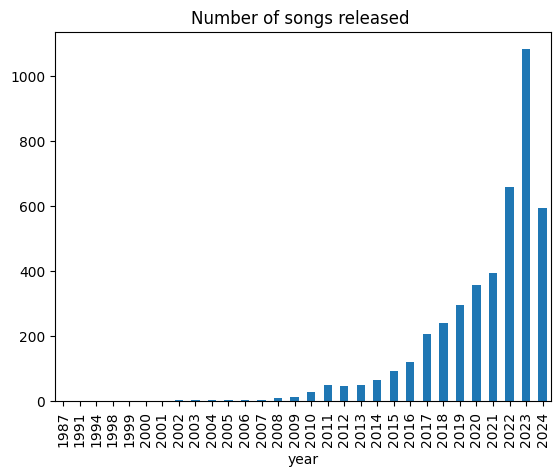

In [10]:
CR_data.groupby('year')['Track'].count().plot(kind='bar',title='Number of songs released ')


It shows from 2000 inward the no of songs were released more and in 2023 there was highst no of songs were released.

Data Wrangling

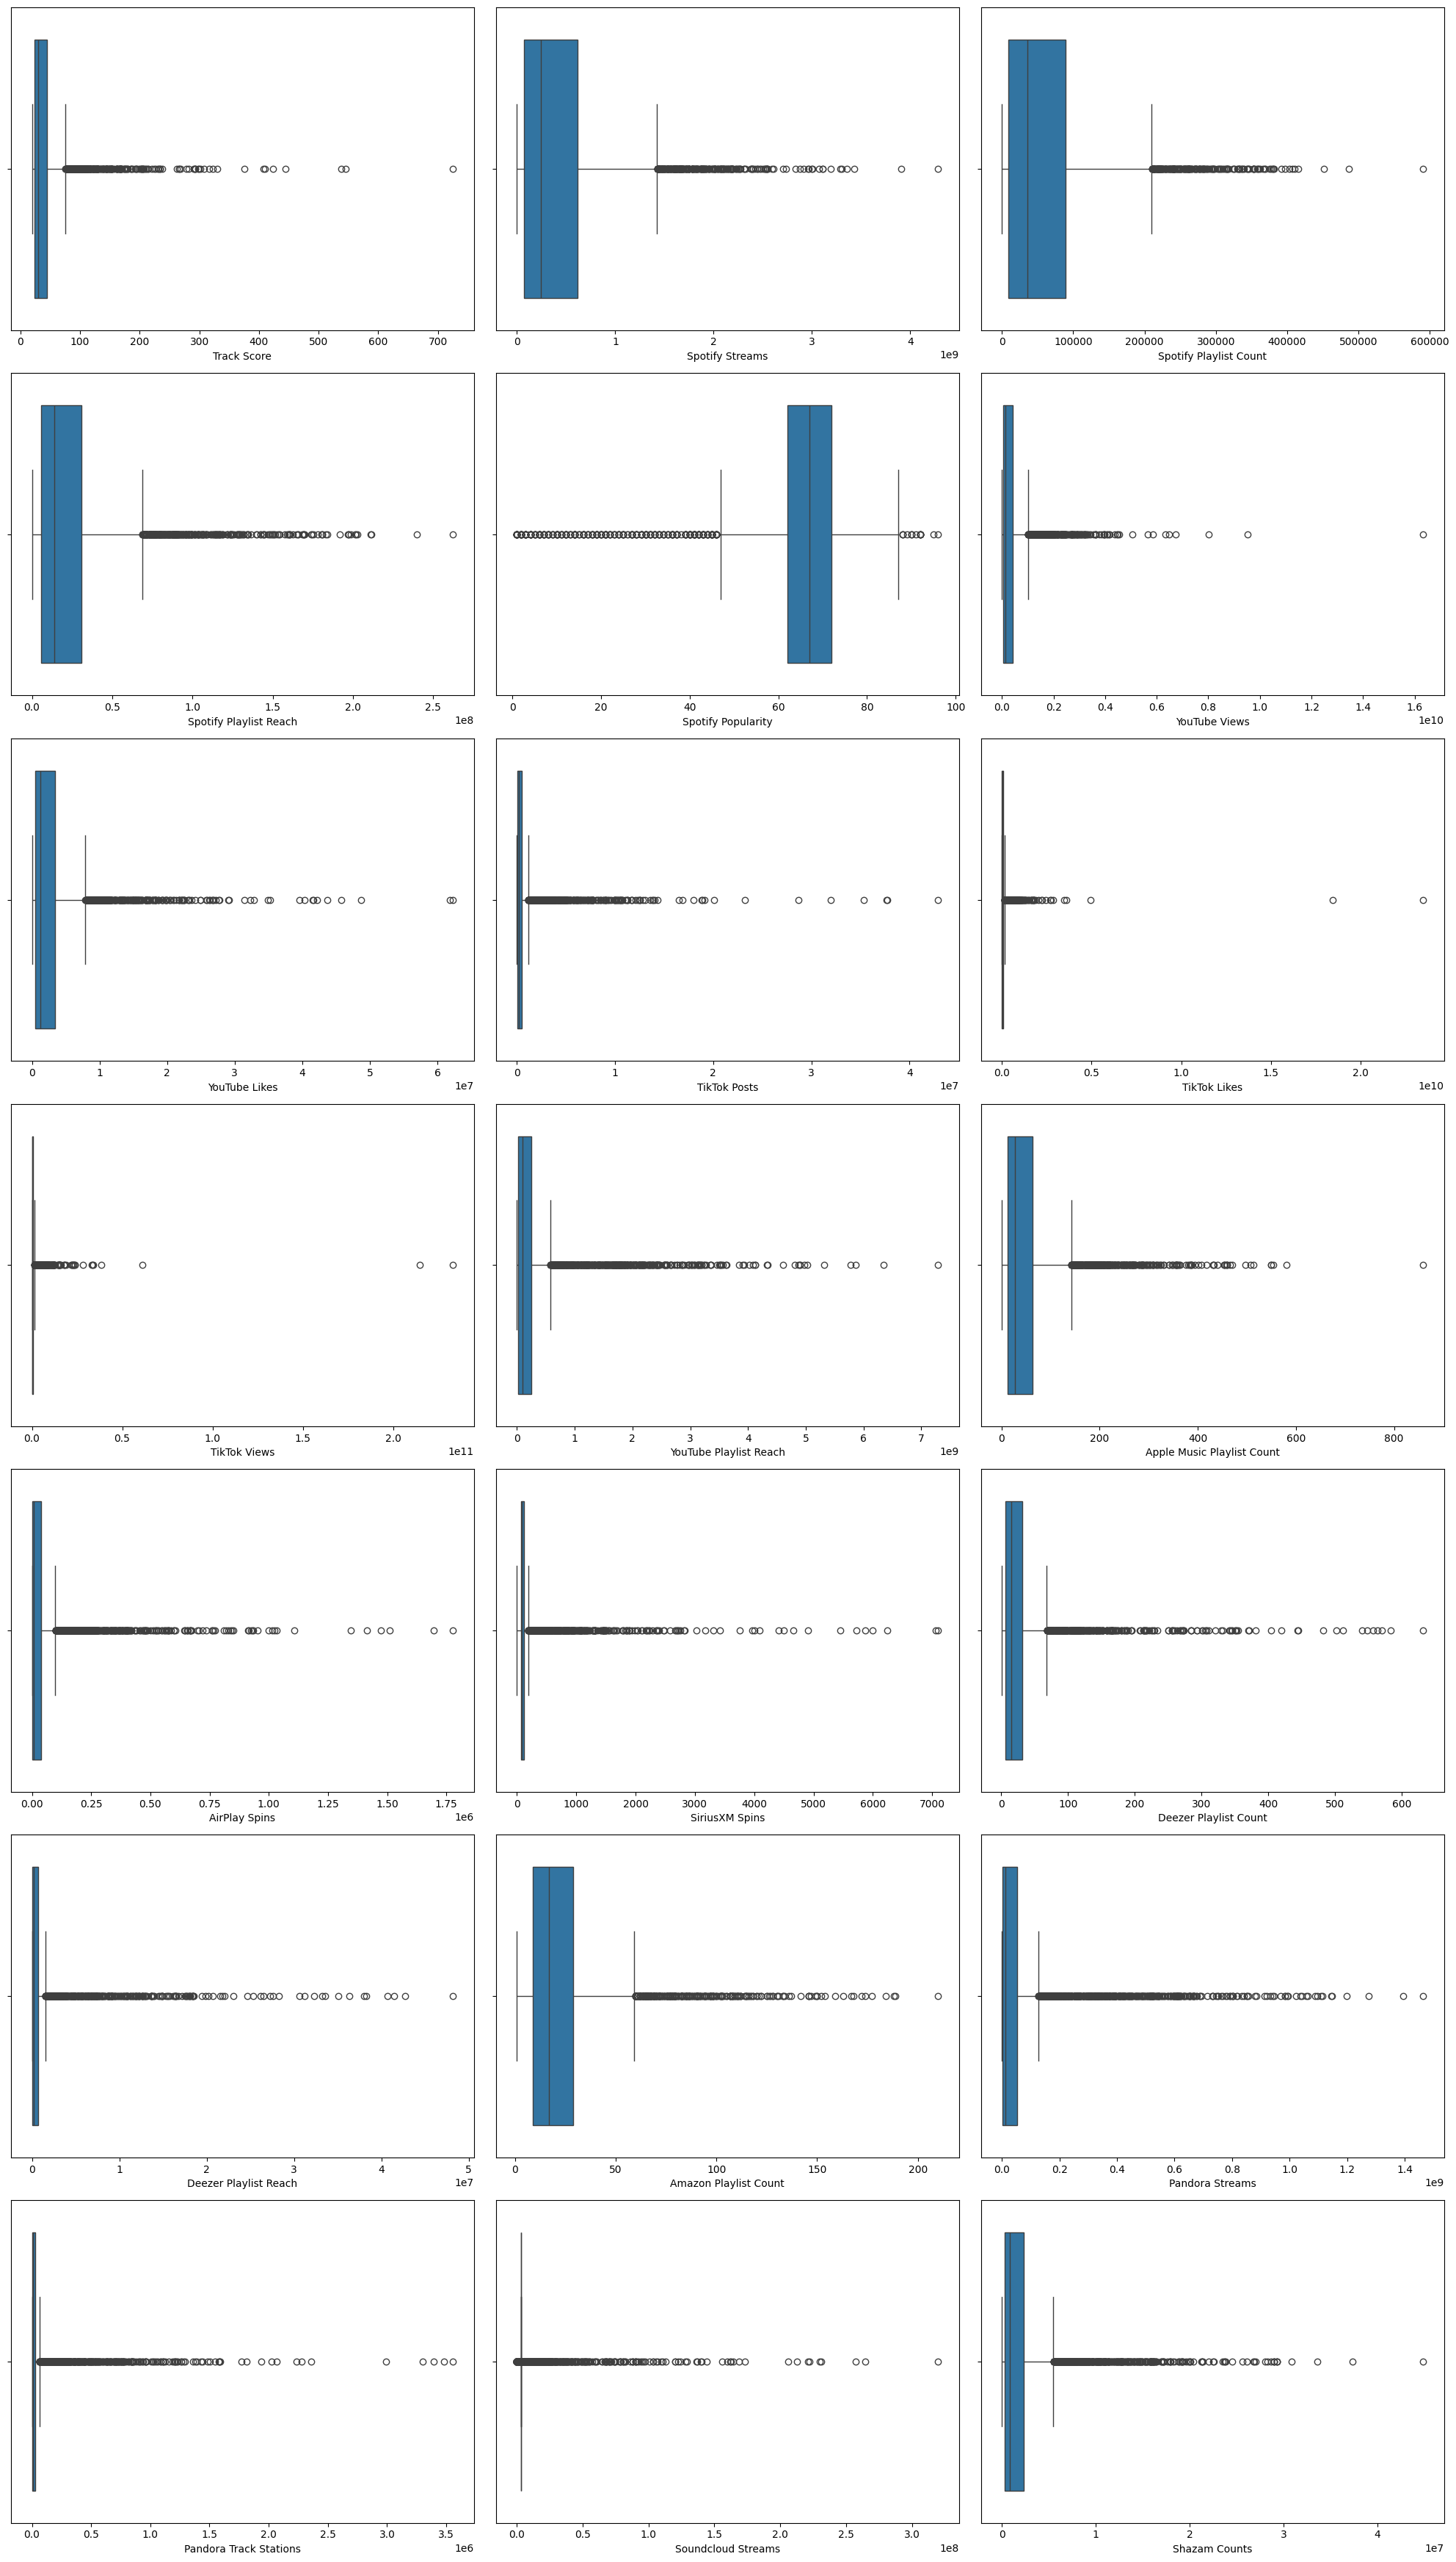

In [11]:
# Get a list of columns that are not of type object, int64, or int32
no_df = [x for x in CR_data.columns if CR_data.dtypes[x] not in ['object', 'int64', 'int32']]
#len(no_df)
cols = 3
rows = int(np.ceil(len(no_df) / cols))

plt.figure(figsize=(20,  5*rows))  # Adjust figure size to fit the subplots
# Plotting boxplot to check for outliers
for e,i in enumerate(no_df):
   # Use enumerate to get the index
  #plt.figure(figsize=(25,  3*rows))
  plt.subplot(rows,cols,e+1)
  sns.boxplot( x=CR_data[i])  # Use CR_data as the dataset and i as the column name
plt.tight_layout()
plt.show()

Since data has more outlier in most of the features, capturing those for further trasformation

In [45]:
#Handling Outlier:
Outliers=CR_data[['Track Score', 'Spotify Playlist Count',
                    'Spotify Playlist Reach', 'Spotify Popularity',
                    'YouTube Views', 'YouTube Likes', 'TikTok Posts',
                    'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
                    'Apple Music Playlist Count', 'AirPlay Spins',
                    'SiriusXM Spins', 'Deezer Playlist Count',
                    'Deezer Playlist Reach', 'Amazon Playlist Count',
                    'Pandora Streams', 'Pandora Track Stations',
                    'Shazam Counts']]

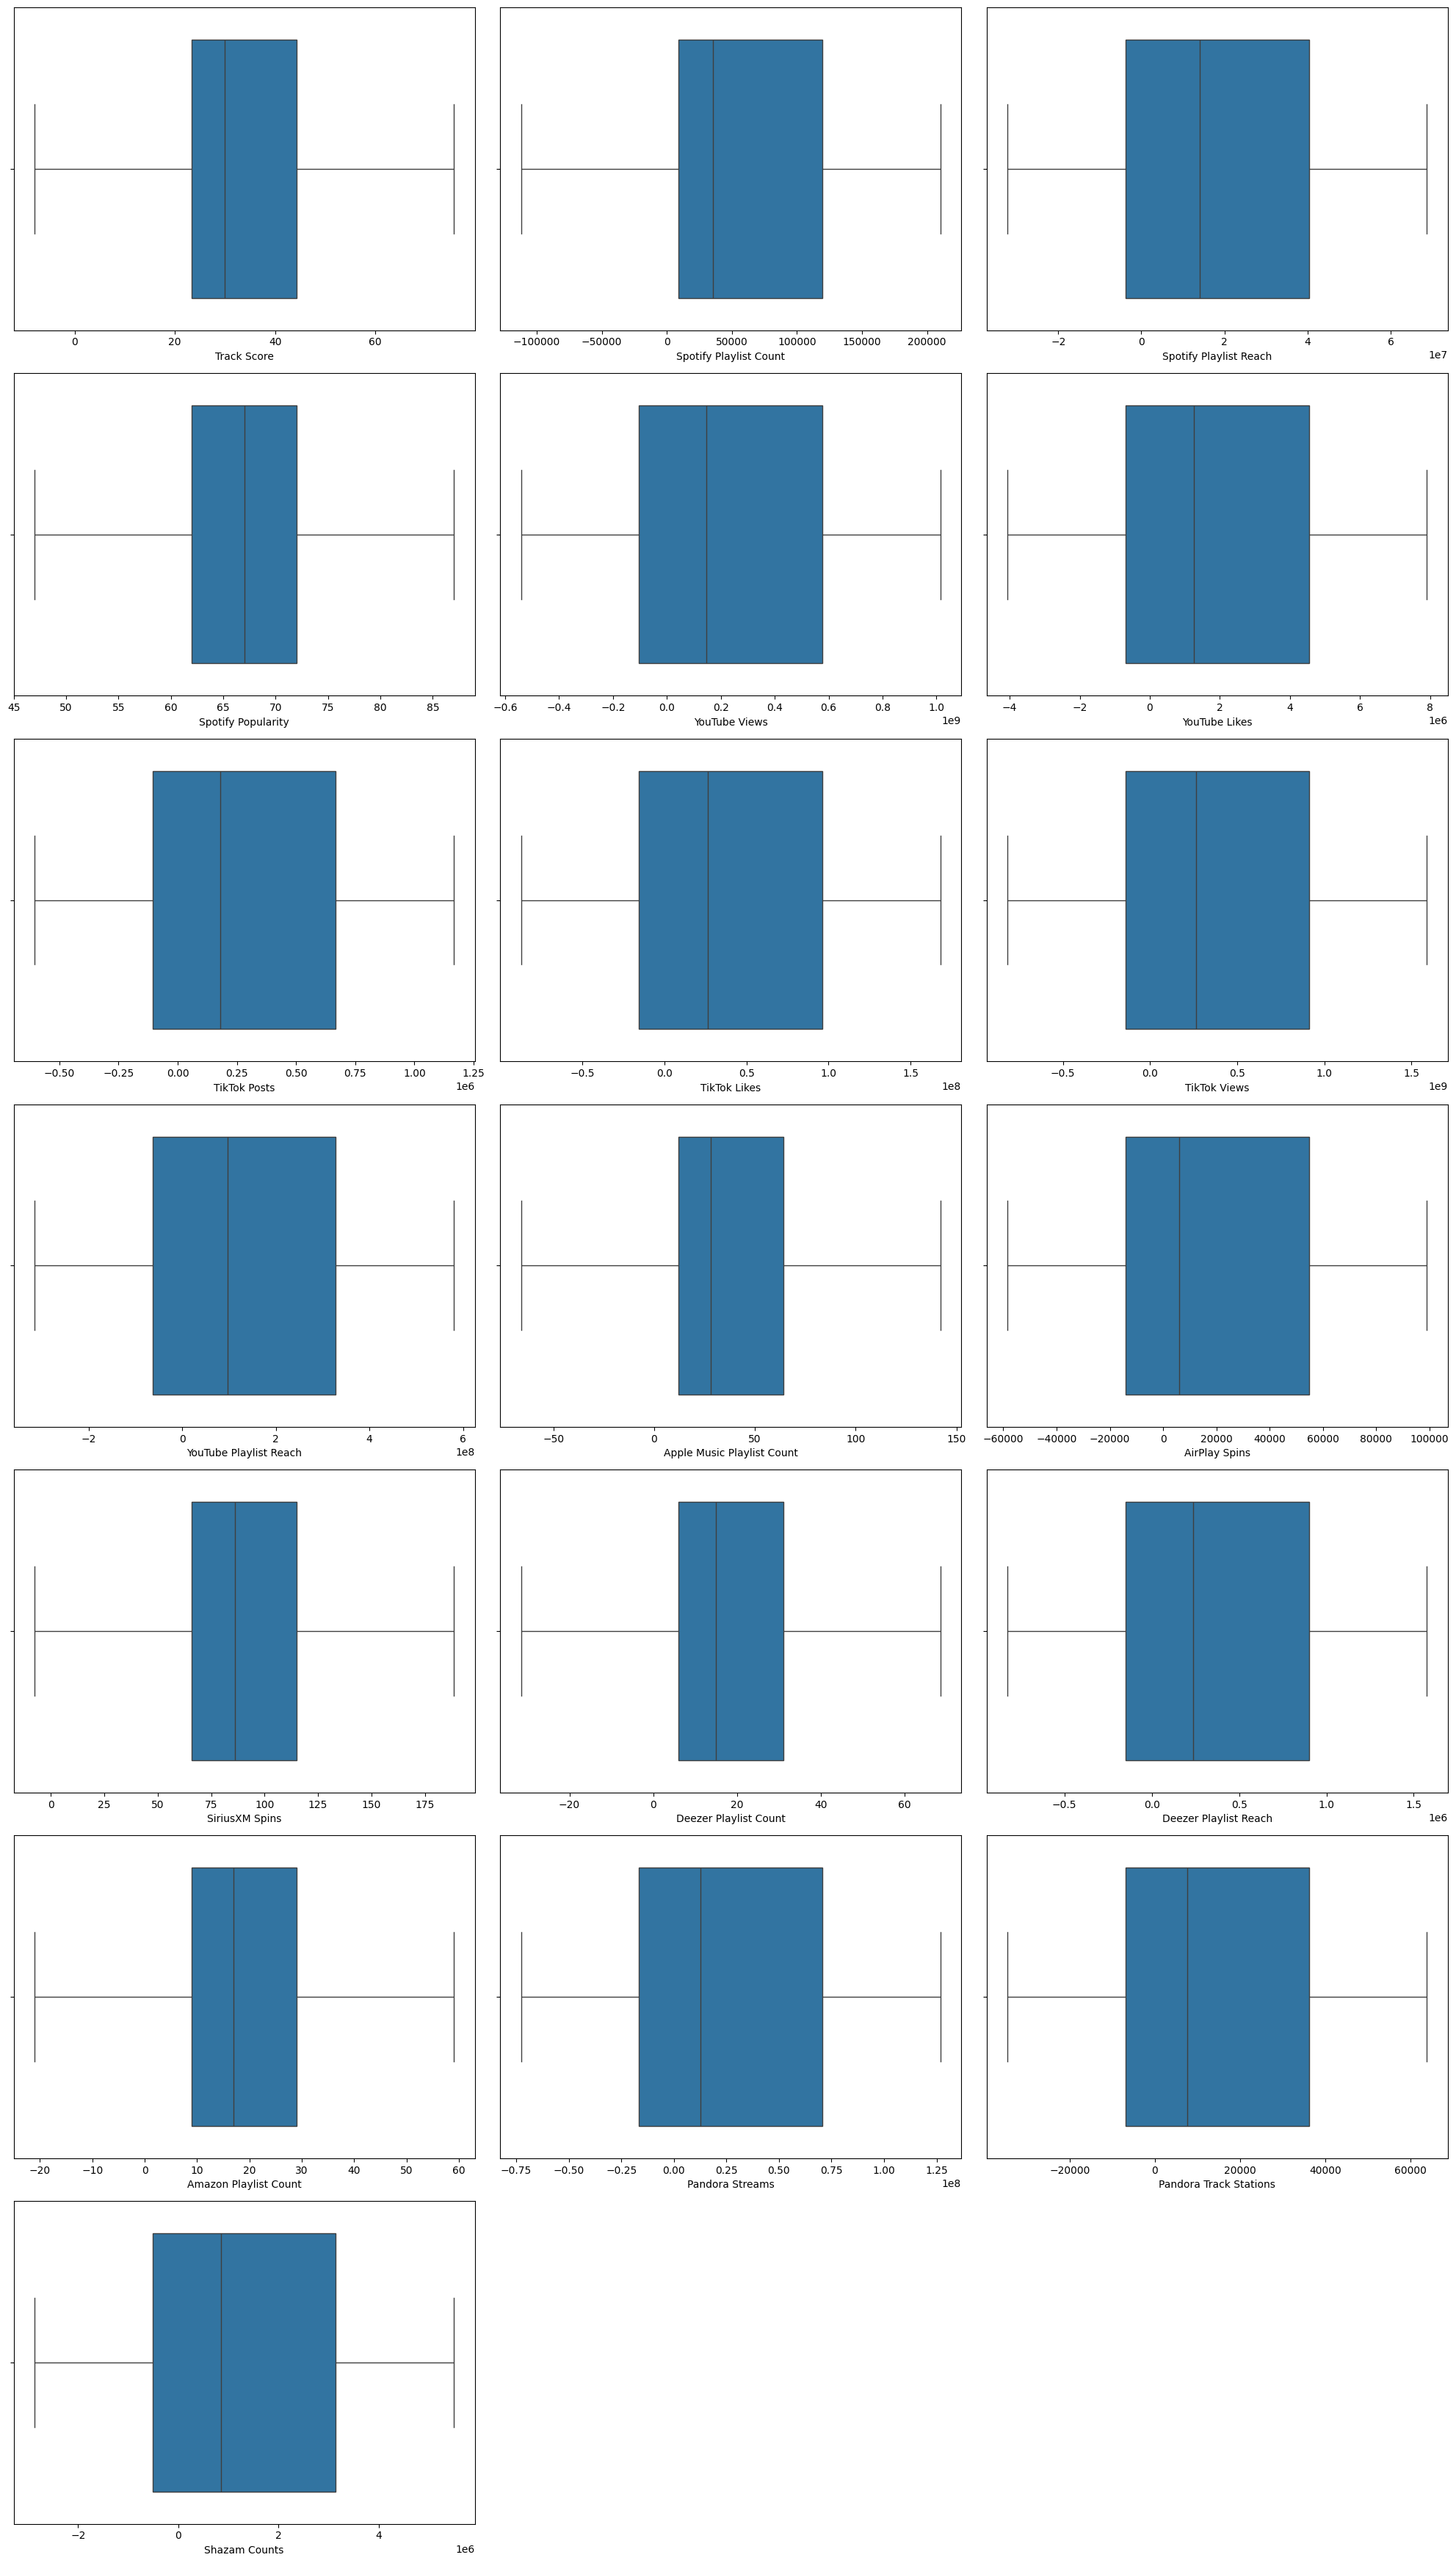

In [52]:
#Capping Outliers
lower=Outliers.quantile(0.25)
upper=Outliers.quantile(0.75)
IQR=upper-lower
upper_lim=upper+1.5*(IQR)
lower_lim=lower-1.5*(IQR)

CR_data=CR_data.copy()

for i in Outliers.columns:
  CR_data[i]=np.where(CR_data[i]>upper[i],upper_lim[i],np.where(CR_data[i]<lower[i],lower_lim[i],CR_data[i]))
plt.figure(figsize=(20,  5*rows))  # Adjust figure size to fit the subplots
#Plotting capperd outlier
for i,e in enumerate(Outliers):
  plt.subplot(rows,cols,i+1)
  sns.boxplot(x=CR_data[e])
plt.tight_layout()
plt.show()





Cleaned the outliers with capping method

Spotify Data Analysis


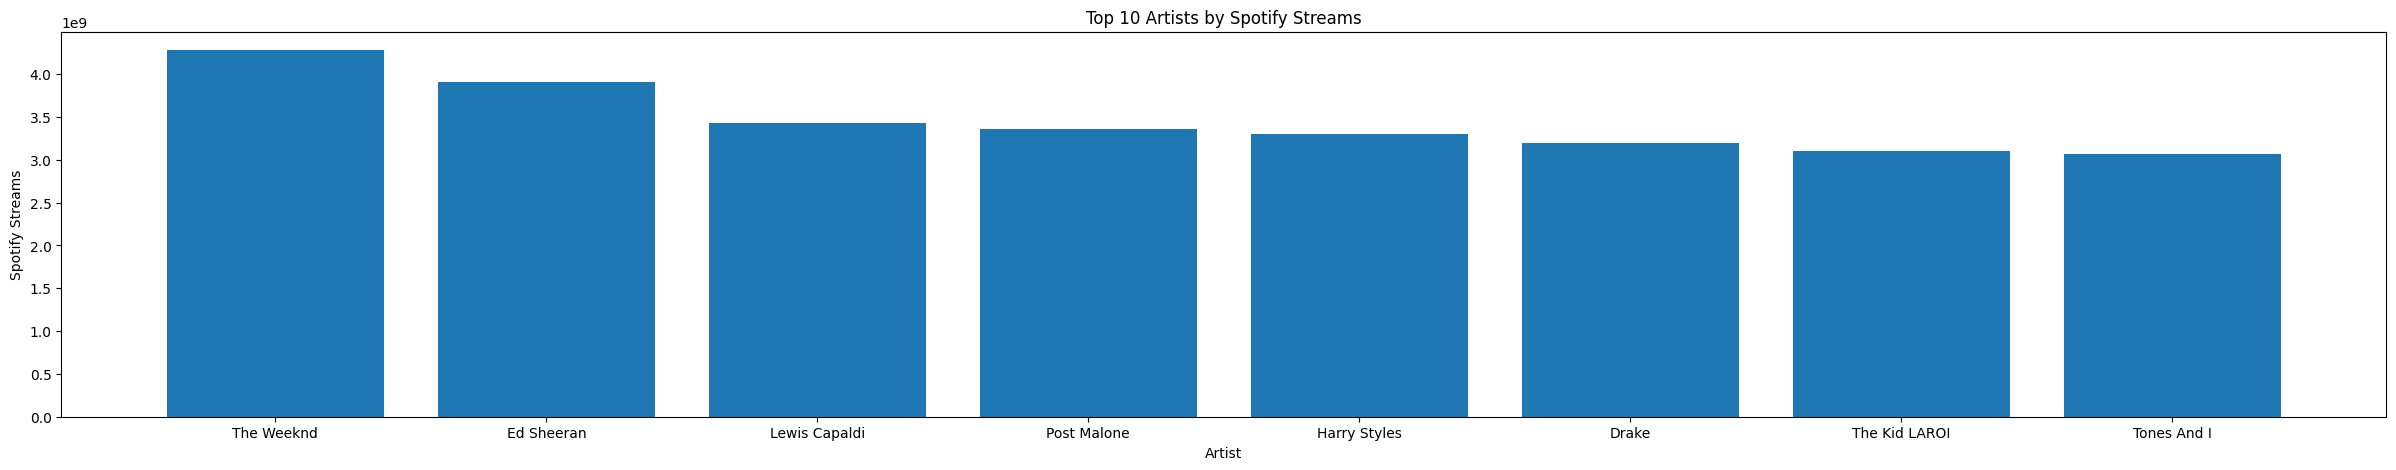

In [37]:
#most streamed Artist on spotify
top_10=CR_data.sort_values(by='Spotify Streams',ascending=False).head(10)
plt.figure(figsize=(30,5))
plt.bar(top_10['Artist'],top_10['Spotify Streams'])
plt.title('Top 10 Artists by Spotify Streams')
plt.xlabel('Artist')
plt.ylabel('Spotify Streams')
plt.show()


In [38]:
CR_data.columns

Index(['Track', 'Album Name', 'Artist', 'All Time Rank', 'Track Score',
       'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'Explicit Track', 'year'],
      dtype='object')

In [39]:
#get trackwise spotyfy streams, spotify popularity, spotify reach
CR_data.groupby('Artist')[CR_data.columns[5:9]].sum().sort_values(by=list(CR_data.columns[5:9]),ascending=False).head(10)


,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity
Artist,,,,
Bad Bunny,3.705144e+10,4431174.0,1.465173e+09,4147.0
The Weeknd,3.613699e+10,4233025.0,1.302749e+09,2007.0
Drake,3.520268e+10,6469132.0,1.706306e+09,4200.0
Taylor Swift,3.422034e+10,2471793.0,2.241343e+09,4467.0
Post Malone,2.613747e+10,3130666.0,1.042300e+09,1548.0
Ed Sheeran,2.401490e+10,2292042.0,9.866022e+08,1024.0
Ariana Grande,2.346499e+10,1928328.0,1.189841e+09,1858.0
Olivia Rodrigo,1.944206e+10,1543251.0,6.520360e+08,1170.0
Imagine Dragons,1.715712e+10,2186998.0,6.530648e+08,1116.0


Youtube Data

In [40]:
#Most streamed artist on youtube
CR_data.groupby('Artist')[CR_data.columns[10:12]].sum().sort_values(by=list(CR_data.columns[10:12]),ascending=False).head(10)


,YouTube Likes,TikTok Posts
Artist,,
BTS,332061931.0,13425552.5
BLACKPINK,245809472.0,19492527.0
Ariana Grande,181417847.0,15661136.5
Ed Sheeran,165721397.0,19527496.5
Bad Bunny,162359075.0,25759825.0
Taylor Swift,153048322.0,17554146.5
Justin Bieber,144967003.0,11231290.0
The Weeknd,136653131.0,8801612.0
Billie Eilish,135451554.0,13208283.0


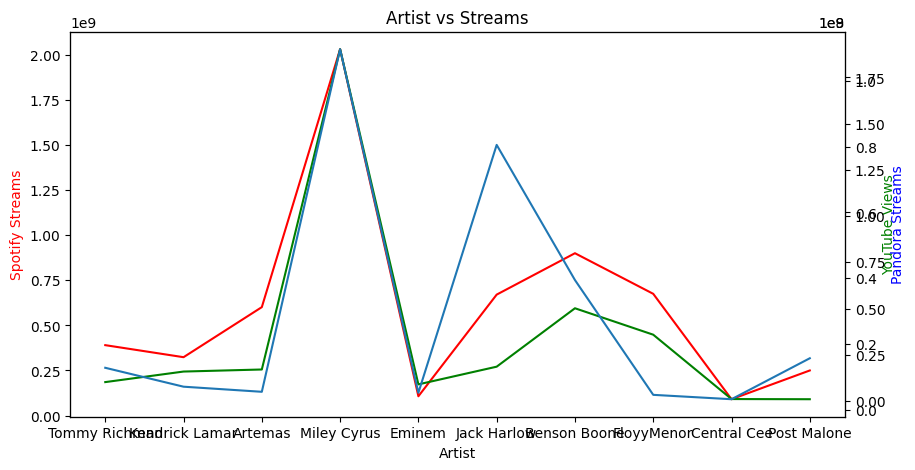

In [41]:
toatlview=CR_data[['Spotify Streams','YouTube Views','Pandora Streams']].sum().sort_values(ascending=False)
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(CR_data['Artist'].head(10),CR_data['Spotify Streams'].head(10),color='red') # Changed 'Astist' to 'Artist'

ax2=ax1.twinx()
ax2.plot(CR_data['Artist'].head(10),CR_data['YouTube Views'].head(10),color='green')

ax3=ax1.twinx()
ax3.plot(CR_data['Artist'].head(10),CR_data['Pandora Streams'].head(10))

ax1.set_xlabel('Artist')
ax1.set_ylabel('Spotify Streams',color='red')
ax2.set_ylabel('YouTube Views',color='green')
ax3.set_ylabel('Pandora Streams',color='blue')

plt.title('Artist vs Streams')
plt.show  ()


Plotted combined views per artist and got the top 10. for further analysis get the artist name and get the most streamed data.

In [42]:
Combined_views = CR_data.groupby('Artist').agg({'Spotify Streams':'sum','YouTube Views':'sum','Pandora Streams':'sum'})
Combined_views.columns

Index(['Spotify Streams', 'YouTube Views', 'Pandora Streams'], dtype='object')

In [43]:
spotify=CR_data.where(CR_data['Artist']=='Miley Cyrus').sort_values(by='Spotify Streams',ascending=False).head(10)
spotify

,Track,Album Name,Artist,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,year
3,Flowers,Flowers - Single,Miley Cyrus,4,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,...,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,3201843.0,11822942.0,0.0,2023.0
2716,Party In The U.S.A.,The Time Of Our Lives (International Version),Miley Cyrus,"2,695",27.1,1.587114e+09,210519.0,147125974.0,76.0,9.935298e+08,...,578.0,56.0,1708084.0,33.0,313563554.0,535359.0,3201843.0,3960920.0,0.0,2009.0
2015,We Can't Stop,NOW: The Hits Of Summer 2014,Miley Cyrus,"2,003",32.2,9.708588e+08,117008.0,50397971.0,71.0,1.310780e+09,...,72.0,72.0,459669.0,29.0,280783593.0,757349.0,906974.0,6946040.0,0.0,2013.0
1701,Angels Like You,Plastic Hearts,Miley Cyrus,"1,697",35.5,9.407968e+08,89447.0,36703975.0,77.0,1.654972e+08,...,331.0,62.0,610903.0,14.0,11547146.0,7441.0,3201843.0,2289799.0,0.0,2020.0
1326,Wrecking Ball,538 Hitzone Best Of 2013,Miley Cyrus,"1,316",41.0,9.300046e+08,113036.0,73538856.0,73.0,1.694451e+09,...,101.0,99.0,530866.0,88.0,449482152.0,959495.0,3201843.0,10011230.0,0.0,2013.0
3763,Malibu,Malibu,Miley Cyrus,"3,763",22.1,8.100448e+08,87422.0,33951824.0,68.0,5.417046e+08,...,132.0,69.0,429231.0,33.0,58182683.0,91836.0,3201843.0,3225942.0,0.0,2017.0
2103,Prisoner (feat. Dua Lipa),Prisoner (feat. Dua Lipa),Miley Cyrus,"2,101",31.5,7.954498e+08,89489.0,26707311.0,67.0,1.561726e+08,...,65.0,72.0,1381166.0,38.0,34048116.0,9490.0,3201843.0,2311374.0,0.0,2020.0
1334,Midnight Sky,Midnight Sky,Miley Cyrus,"1,323",40.8,6.293722e+08,86326.0,19484618.0,66.0,3.013625e+08,...,130.0,76.0,497102.0,66.0,46663846.0,18489.0,3201843.0,4783852.0,0.0,2020.0
226,Used To Be Young,Endless Summer Vacation,Miley Cyrus,227,102.4,2.054681e+08,30639.0,39407660.0,69.0,6.162496e+07,...,266.0,64.0,1571733.0,62.0,55443800.0,10442.0,111534.0,1999859.0,0.0,2023.0
1203,Jaded,Endless Summer Vacation,Miley Cyrus,"1,197",43.3,1.733492e+08,22117.0,9481406.0,65.0,6.997178e+07,...,416.0,41.0,782200.0,20.0,56973358.0,6891.0,3201843.0,856278.0,1.0,2023.0


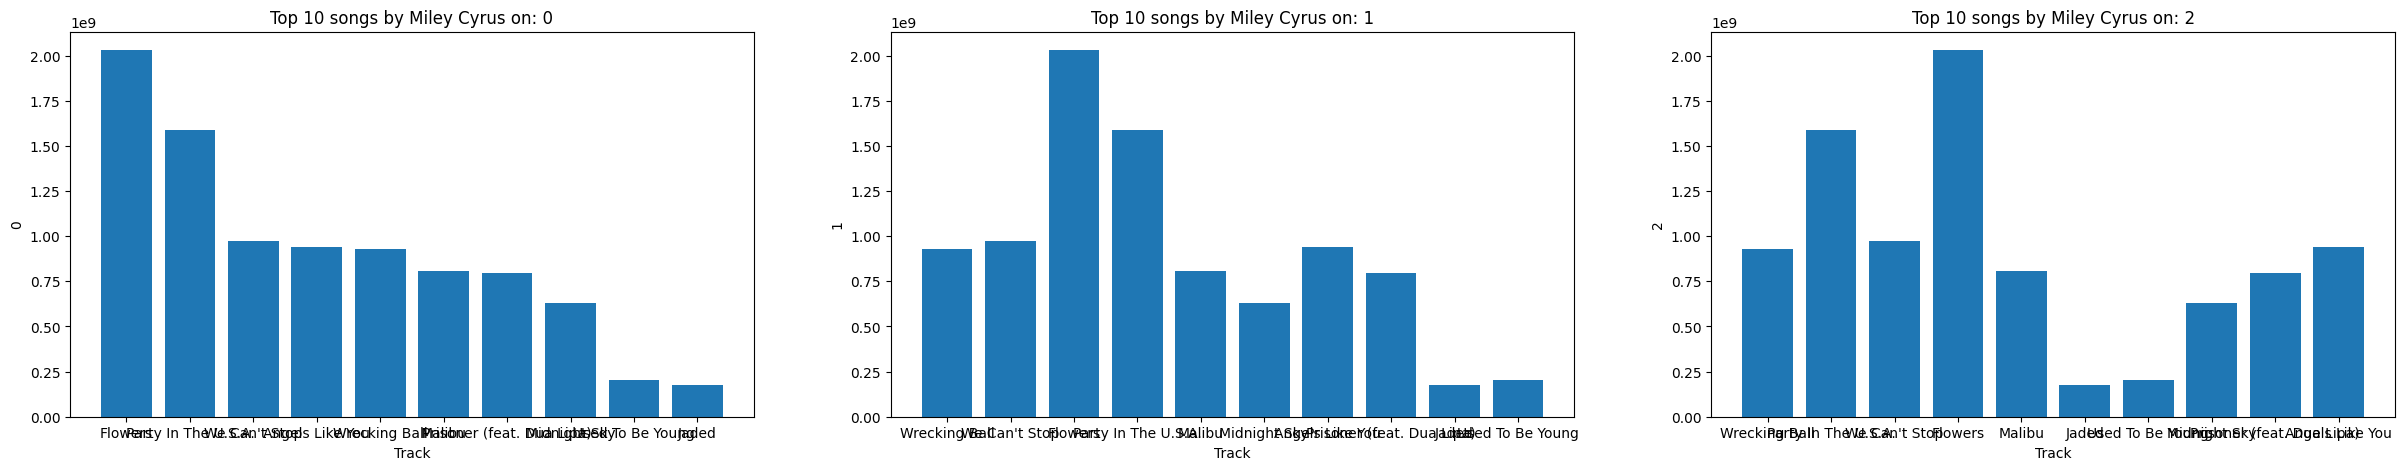

In [44]:
#getting most stream songs on spotfy, youtube for top artist like Miley Cyrus
total=CR_data['Spotify Streams']+CR_data['YouTube Views']+CR_data['Pandora Streams']
CR_data['Total Streams']=total

spotify=CR_data.where(CR_data['Artist']=='Miley Cyrus').sort_values(by='Spotify Streams',ascending=False).head(10)
youtube=CR_data.where(CR_data['Artist']=='Miley Cyrus').sort_values(by='YouTube Views',ascending=False).head(10)
pandora=CR_data.where(CR_data['Artist']=='Miley Cyrus').sort_values(by='Pandora Streams',ascending=False).head(10)
lis=[spotify,youtube,pandora]
plt.figure(figsize=(30,5))
plt.subplot(1,3,1)
for i, df in enumerate(lis):
  plt.subplot(1,3,i+1)
  plt.bar(df['Track'],df['Spotify Streams'])
  plt.title(f'Top 10 songs by Miley Cyrus on: {i}')
  plt.xlabel('Track')
  plt.ylabel(f'{i}')
plt.show()